In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM

In [2]:
# Get the data, read csv file into data frame
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600


In [3]:
# Check the rows and columns of df
df.shape

(10531, 7)

In [7]:
# Check if there is null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Check the data types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10531 entries, 0 to 10530
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10531 non-null  object 
 1   Open       10531 non-null  float64
 2   High       10531 non-null  float64
 3   Low        10531 non-null  float64
 4   Close      10531 non-null  float64
 5   Adj Close  10531 non-null  float64
 6   Volume     10531 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 576.0+ KB


In [9]:
# Change [Date] data type to data time

df['Date'] = pd.to_datetime(df.Date)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10531 entries, 0 to 10530
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10531 non-null  datetime64[ns]
 1   Open       10531 non-null  float64       
 2   High       10531 non-null  float64       
 3   Low        10531 non-null  float64       
 4   Close      10531 non-null  float64       
 5   Adj Close  10531 non-null  float64       
 6   Volume     10531 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 576.0 KB


In [11]:
# Delete 'Adj Close' column and check df
df = df.drop('Adj Close', axis=1)
df.tail()

,Date,Open,High,Low,Close,Volume
10526,2022-09-13,159.899994,160.539993,153.369995,153.839996,122656600
10527,2022-09-14,154.789993,157.100006,153.610001,155.309998,87965400
10528,2022-09-15,154.649994,155.240005,151.380005,152.369995,90481100
10529,2022-09-16,151.210007,151.350006,148.369995,150.699997,162157000
10530,2022-09-19,149.309998,154.559998,149.100006,154.479996,81474200


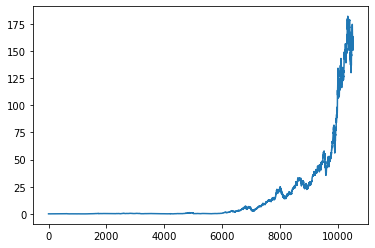

In [47]:
# Vistulize the stock price trend by using 'Close' column
plt.plot(df['Close'])
plt.show()

# Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
# Split our preprocessed data into our features and target arrays

X = df[['Open','High','Low','Volume']].values
y = df['Close'].values

In [19]:
# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Check the shape of X_train and X_test

print(X_train.shape)
print(X_test.shape)

(7898, 4)
(2633, 4)


In [21]:
# Build linear reg model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make stock price prediction

prediction = lr_model.predict(X_test)

print(prediction.shape)

(2633,)


In [26]:
# Compare y_test and our prediction value

pred_df = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':prediction})

pred_df.head(20)

,Actual Price,Predicted Price
0,0.277902,0.277306
1,0.085379,0.089221
2,16.556429,16.664204
3,0.215402,0.219529
4,0.373929,0.372355
5,96.522499,96.692392
6,0.134487,0.136615
7,3.278929,3.262970
8,0.113281,0.118225
9,1.330000,1.330061


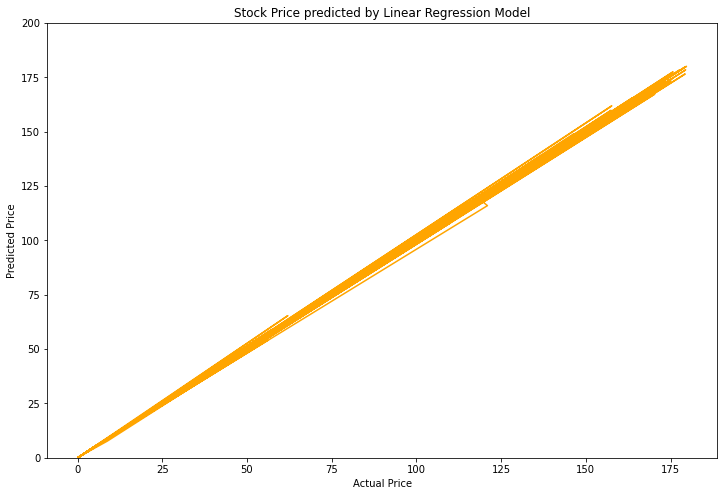

In [35]:
# Plot the actual and predicted price
plt.figure(figsize=(12, 8))
plt.plot(y_test, prediction, color='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.ylim(0, 200)
plt.title("Stock Price predicted by Linear Regression Model")
plt.show()

In [36]:
print(lr_model.coef_)
print(lr_model.intercept_)

[-6.21103318e-01  8.48172871e-01  7.72097730e-01 -1.31550326e-12]
0.003516522024439084


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

ValueError: continuous is not supported

In [38]:
# Calculate the MSE for our model
# The mean squared error (MSE) tells you how close a regression line is to a set of points
# return a non-negative floating point value (the best value is 0.0)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

0.08634745684345325

# Using more popular LSTM model to predict stock price

In [105]:
# Choose "Closed" price column as our input variable
close_df= df['Close']
close_df_train = close_df.loc[close_df.index < len(close_df)*0.8]
close_df_test = close_df.loc[close_df.index >= len(close_df)*0.8]

print(close_df_train.head())
print()
print(close_df_test.head())

0    0.128348
1    0.121652
2    0.112723
3    0.115513
4    0.118862
Name: Close, dtype: float64

8425    20.912144
8426    21.172501
8427    21.205713
8428    21.209642
8429    21.029285
Name: Close, dtype: float64


In [73]:
# Scale the training data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_df_train.values.reshape(-1,1))
scaled_data.shape

(8425, 1)

In [70]:
# Use the previous 30 days 'close' price to predict the 31st day's price
previous_days = 30

In [71]:
# Splite data into X_train and y_train
X_train = []
y_train = []

for i in range(previous_days, len(scaled_data)):
    X_train.append(scaled_data[i-previous_days:i, 0])
    y_train.append(scaled_data[i, 0])

In [100]:
# Convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(8365, 60, 1)
(8365,)


In [75]:
# Reshape the X_train since LSTM needs 3-dimensional inputs
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(8365, 60, 1)

In [76]:
# Build the LSTM model
model = Sequential()
# Add LSTM layer
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = 50))
# prediction output layer
model.add(Dense(units=1))

In [77]:
# compile and train the data
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size =100, epochs=20)

Epoch 1/20
84/84 [==============================] - 10s 68ms/step - loss: 0.0040
Epoch 2/20
84/84 [==============================] - 6s 70ms/step - loss: 1.1894e-04
Epoch 3/20
84/84 [==============================] - 6s 71ms/step - loss: 1.1103e-04
Epoch 4/20
84/84 [==============================] - 6s 71ms/step - loss: 1.0729e-04
Epoch 5/20
84/84 [==============================] - 6s 69ms/step - loss: 1.0521e-04
Epoch 6/20
84/84 [==============================] - 6s 71ms/step - loss: 1.0719e-04
Epoch 7/20
84/84 [==============================] - 6s 72ms/step - loss: 9.7802e-05
Epoch 8/20
84/84 [==============================] - 6s 72ms/step - loss: 8.4433e-05
Epoch 9/20
84/84 [==============================] - 6s 70ms/step - loss: 1.1608e-04
Epoch 10/20
84/84 [==============================] - 6s 71ms/step - loss: 8.4419e-05
Epoch 11/20
84/84 [==============================] - 6s 71ms/step - loss: 8.1992e-05
Epoch 12/20
84/84 [==============================] - 6s 70ms/step - loss: 7.8

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [81]:
#### Test model ####

# Scale the testing data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_data = scaler.fit_transform(close_df_test.values.reshape(-1,1))
scaled_test_data.shape

(2106, 1)

In [82]:
# Create X_test and y_test
X_test = []
y_test = []

for i in range(previous_days, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-previous_days:i, 0])
    y_test.append(scaled_test_data[i, 0])

In [83]:
# Convert the X_test and y_test to numpy arrays
X_test = np.array(X_test)
print(X_test.shape)

(2046, 60)


In [84]:
# reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(2046, 60, 1)


In [87]:
# Predict the data

prediction = model.predict(X_test)
prediction = scaler.inverse_transform(predictions)

64/64 [==============================] - 1s 12ms/step


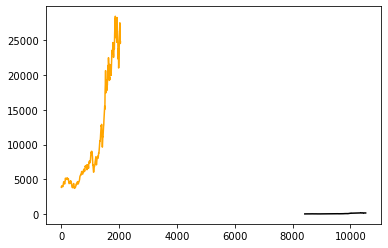

In [106]:
# plot test predictions

plt.plot(prediction, color = 'orange')
plt.plot(close_df_test, color = 'black')
plt.show()